In [1]:
import pandas as pd
import geopandas as gpd
import fiona
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FloatImage
from folium import GeoJsonTooltip
import matplotlib.pyplot as plt
import textwrap

In [2]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [3]:
project_gdf = gpd.read_file('Development_Projects.kml', driver = 'KML')

In [4]:
project_gdf['center_point'] = project_gdf.geometry.centroid

C:\Users\aefar\AppData\Local\Programs\Python\Python38\lib\site-packages\geopandas\array.py:524: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return _unary_geo("centroid", self)
C:\Users\aefar\AppData\Local\Programs\Python\Python38\lib\site-packages\geopandas\geoseries.py:133: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)


In [5]:
project_gdf

,Name,Description,geometry,center_point
0,South Dade Logistics and Technology Hub,This shows the entire 800-acre site.,"POLYGON Z ((-80.38811 25.51828 0.00000, -80.36...",POINT (-80.37605 25.52401)
1,Homestead Park of Commerce,"EastGroup Properties, based in Jackson, Missis...","POLYGON Z ((-80.43359 25.46105 0.00000, -80.43...",POINT (-80.43218 25.46046)
2,CityPlace Homestead,"This is where Related Urban, a subsidiary of J...","POLYGON Z ((-80.46536 25.47706 0.00000, -80.46...",POINT (-80.46725 25.47615)
3,Homestead Station,The city completed the Homestead Station proje...,"POLYGON Z ((-80.47742 25.46977 0.00000, -80.47...",POINT (-80.47839 25.46948)


In [6]:
# mbc.at[0,'Name']=('Curfew area')

In [7]:
# data = {'description':['This shows the entire 800-acre site.',\
#                'Mango\'s Tropical Cafe',\
#                'The Clevelander Bar',\
#                'Story Nightclub'],
#        'lat':[25.3128,\
#              25.779488788858867, ## Mango's
#              25.78100360218833, ## The Clevander 
#              25.770678948362917], ## Story Nightclub 
#        'lon':[-80.2234,
#              -80.13121290171135, ## Mango's
#              -80.1308607863681, ## The Clevander
#              -80.13400121520405]} ## Story Nightclub

# # df = pd.DataFrame(data)

# # df

C:\Users\aefar\AppData\Local\Programs\Python\Python38\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


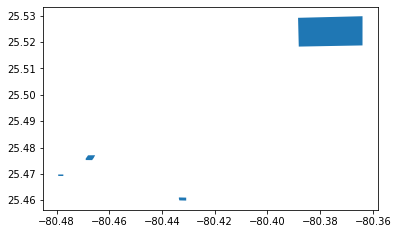

In [8]:
project_gdf.plot(figsize=(6,6))
plt.show()

In [11]:
m = folium.Map(location=[25.49,-80.4], zoom_start=12, tiles='CartoDB positron')

for i, r in project_gdf.iterrows():
    try:
        sim_geo = gpd.GeoSeries(r['geometry'])
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j)
        folium.Popup(r['Name']).add_to(geo_j)
        geo_j.add_to(m)
    except Exception as e:
        print(e)

# for i, r in project_gdf.iterrows():
#     try:
#         sim_geo = gpd.GeoSeries(r['center_point'])
#         geo_j = sim_geo.to_json()
#         geo_j = folium.GeoJson(data=geo_j)
#         info = (r['Description'])
#         info_split = textwrap.wrap(info, 50)
#         desc = '<br>'.join(info_split)
#         text = f'{desc}'
#         folium.Marker(location=geo_j,tooltip=text).add_to(m)
#     except Exception as e:
#         print(e)

m

In [12]:
m.save('index.html')